In [1]:
# import usual libraries for machine learing and data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# import naive bayes classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

# Prepare the data

In [2]:
df = pd.read_csv('./Dataset/heart_encode_scaled.csv')
df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.244898,0.444444,0.633540,0.0,0.5,0.770992,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.428571,0.629630,0.295031,0.0,0.5,0.648855,0.0,0.161290,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.183673,0.351852,0.614907,0.0,1.0,0.206107,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.408163,0.425926,0.400621,0.0,0.5,0.282443,1.0,0.241935,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.530612,0.537037,0.341615,0.0,0.5,0.389313,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [3]:
# split the data into training and testing data using train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Comparing already made models

### Gaussian Naive Bayes

In [ ]:
# create prediction using naive bayes classifier
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)
y_pred = GaussianNB_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

### Multinomial Naive Bayes

In [ ]:
multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(X_train, y_train)
y_pred = multinomialNB_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

### Categorical Naive Bayes

In [ ]:
categoricalNB_model = CategoricalNB()
categoricalNB_model.fit(X_train, y_train)
y_pred = categoricalNB_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

# Model from scratch

In [20]:
from collections import Counter

class GaussianNB_Classifier:
    def get_prior(self, data):
        """
        data : list data
        """
        n_data = len(data)
        prior = Counter(data)
        for key in prior.keys():
            prior[key] = prior[key] / n_data
        return prior

    def get_mean_and_std(self, data):
        list_columns = data.columns[:-1]
        class_column_name = data.columns[-1]
        list_class = set(data[class_column_name])

        mean = {}
        std = {}

        for column in list_columns:
            for a_class in list_class:
                mean[(column, a_class)] = np.mean(
                    data.loc[data[class_column_name] == a_class][column])
                std[(column, a_class)] = np.std(
                    data.loc[data[class_column_name] == a_class][column])

        return mean, std

    def get_gaussian_likelihood(self, data, mean, std):
        res = (1/np.sqrt(2*np.pi*(std**2)))
        res *= np.exp((-1*((data-mean)**2))/(2*(std**2)))

        return res

    def training_gaussianNB(self, X, y):
        X = X.join(y)
        prior = self.get_prior(y)
        mean, std = self.get_mean_and_std(X)

        list_class = set(y)
        list_columns = X.columns[:-1]

        model = {}
        model['prior'] = prior
        model['mean'] = mean
        model['std'] = std
        model['class'] = list_class
        model['columns'] = list_columns

        return model

    def __init__(self, X, y):
        self.model = self.training_gaussianNB(X, y)

    def get_single_prediction(self, data):
        prior = self.model['prior']
        mean = self.model['mean']
        std = self.model['std']
        list_class = self.model['class']
        list_columns = self.model['columns']
        posterior = dict.fromkeys(list_class, 1)

        for a_class in list_class:
            for column in list_columns:    
                posterior[a_class] *= self.get_gaussian_likelihood(
                    data[column], mean[(column, a_class)], std[(column, a_class)])
            posterior[a_class] *= prior[a_class]

        kelas_uji = max(posterior, key=posterior.get)
        return kelas_uji

    def predict(self, X_test):
        y_pred = []
        for index, row in X_test.iterrows():
            y_pred.append(self.get_single_prediction(row))
        return np.array(y_pred)


In [21]:
gnb = GaussianNB_Classifier(X_train, y_train)
y_pred = gnb.predict(X_test)

In [22]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8299319727891157


<AxesSubplot:>

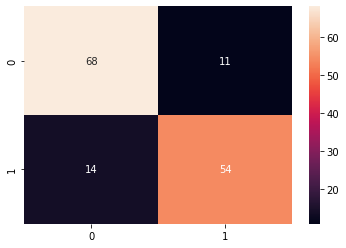

In [23]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)